# ECE 4120/5124 Quantum Engineering
## Lab / Homework 3 Quantum Circuits
Oct 29/Nov 5, 2025

## DUE Nov 25, 2025

## Description

In this lab, we will build quantum gates and circuits using the Google Quantum AI package, cirq, and perform quantum measurements using the quantum simulator.

Documents for *cirq* can be find at [https://quantumai.google/cirq](https://quantumai.google/cirq)

## Instructions for submission
* Completed iPython notebook. We will inspect the code and run your notebook.
* Solutions/answer to the corresponding problems (type in the iPython notebook  OR  in a seperate document.)

## Acknowledgement
We thank John Ghra for setting up the Jupyterhub. We thank Dr. Ming Jin for iPython notebook.

## 1. Running environment
We need several Phyton packages to develop quantum circuits.

First, run the code below to ensure you have necessary packages installed.

In [1]:
import time
import random

try:
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    import cirq
    from cirq.contrib.svg import SVGCircuit
    import sympy
    from tqdm.notebook import trange, tqdm

except ImportError or ModuleNotFoundError:
    print("Installing packages")
    !pip install cirq
    !pip install numpy
    !pip install matplotlib
    !pip install sympy

finally:
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    import cirq
    from cirq.contrib.svg import SVGCircuit
    import sympy
    import logging
    from tqdm.notebook import trange, tqdm
    logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
    print("Packages imported sucessfully.")

Installing packages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 84.6 MB/s eta 0:00:00
Packages imported sucessfully.


You should see the print *packages imported sucessfully.*

## 2. Single-qubit (unary) gates

In this section, we will create a qubit, apply some single qubit gates, and perform quantum measurements.

The following example, show one qubit named *q0*, and we applied an $H$ gate.

Circuit diagram only use characters.
q0: ───H───M───
A better look of the circuit diagram.


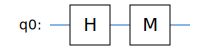

In [2]:
#create a Quantum Circuit
circuit = cirq.Circuit()

# create a Named qubit
# qubits are initialized as 0
q0 = cirq.NamedQubit('q0')

# add H gate to circuit
circuit.append(cirq.H(q0))

# add a measurement in the circuit
circuit.append(cirq.measure(q0))

#print the circuit
print("Circuit diagram only use characters.")
print(circuit)

print("A better look of the circuit diagram.")
SVGCircuit(circuit)


Now we can add a quantum simulator and perform quantum experiments.

In [3]:
simulator = cirq.Simulator()
result = simulator.run(circuit)

print(result)

q0=1


You may run the above quantum experiment for multiple times. You may notice that sometimes it get $|0>$ and sometimes it gets $|1>$, which is expect as $H$ gate results in a superposition state.

Now let's perform multiply measurements and get the statistics of the measured states.

In [4]:
# number of quantum experiments/measurements
N = 10000

simulator = cirq.Simulator()

n0 = 0
n1 = 0

for i in tqdm(range(N)):
    result = simulator.run(circuit)
    # this is how you get the measured results, details refer to the cirq documents.
    q0res = result.measurements['q0'][0][0]
    if q0res == 0:
        n0 += 1
    else:
        n1 += 1

print(f"Number of measurements to get 0: {n0}   # to get 1: {n1}.")
print(f"The ratio to get 0: {n0/N}   ratio to get 1: {n1/N}.")

  0%|          | 0/10000 [00:00<?, ?it/s]

Number of measurements to get 0: 5124   # to get 1: 4876.
The ratio to get 0: 0.5124   ratio to get 1: 0.4876.


## Reference: Quantum gates
Reference / Funcation names of gates can be found at [https://quantumai.google/cirq/build/gates](https://quantumai.google/cirq/build/gates)

### Problem 1: Exponential of $X$ gate  (20 pts)

Now let's consider the exponential of $X$ gate, i.e.  $X^a$, where a is a real number.  

For an initial |0>, can you show the probability to get |1> after the $X^a$ gate.

You can construct the $X^a$ gate by  ``cirq.X(q0)**a`` , where ``**`` is the exponential operator in Python.

#### Problem 1.1: complete the following code to constructe a quantum circuit with $X^a$ gate.

In [5]:
def circuitWithXtoAgate(a:float):

    #create a Quantum Circuit
    circuit = cirq.Circuit()

    # create a Named qubit
    # qubits are initialized as 0
    q0 = cirq.NamedQubit('q0')

#############  Write your Code here ########


def circuitWithXtoAgate(a: float):
    # First we create a Quantum Circuit using this
    circuit = cirq.Circuit()

    # Next we create a Named qubit (initialized in |0⟩)
    q0 = cirq.NamedQubit('q0')

    # Afterwards applying X^a
    circuit.append(cirq.X(q0) ** a)

    # finally measuring the same
    circuit.append(cirq.measure(q0))

    return circuit


#############  End of your Code here ########

    return circuit

Let's sweep the parameter - exponential a, and see how we measure the qubit q0.

In [6]:
simulator = cirq.Simulator()

# range of a, from 0 to 2.
alist = np.arange(0,2,0.1)

# number of measurements for each parameter a
N = 1000

#list to save result
res = []

for a in tqdm(alist):
    circuit1 = circuitWithXtoAgate(a)
    n0 = 0
    n1 = 0
    for i in range(N):
        result = simulator.run(circuit1)
        q0res = result.measurements['q0'][0][0]
        if q0res == 0:
            n0 += 1
        else:
            n1 += 1
    res.append(float(n1)/N)


  0%|          | 0/20 [00:00<?, ?it/s]

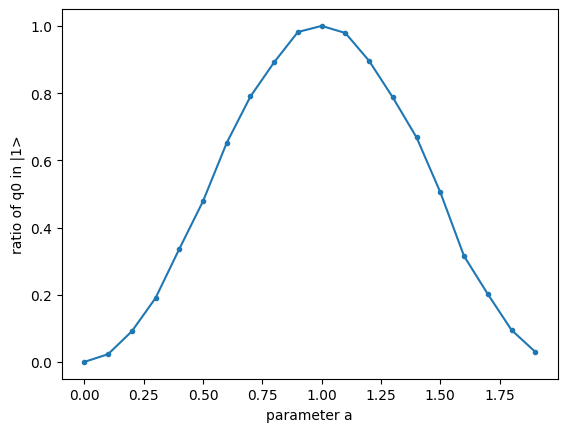

In [7]:
#plot the results
plt.plot(alist,res, '.-')
plt.xlabel("parameter a");
plt.ylabel("ratio of q0 in |1>");

#### Problem 1.2  What's your observation of simulated results with the $X^a$ gate?  
(you can type your answer below)

The measured probability of |1> varies sinusoidally with the exponent a. It is ~0 at a = 0, rises to ~0.5 at a = 0.5, peaks near ~1 at a = 1. It then falls symmetrically at ~0.5 at a = 1.5 and back to ~0 to a = 2.

So the curve is a sin^2 shape with period 2 in a, exactly what we expect for an X axis rotation.


#### Problem 1.3 What's the expected value of the measurement after the $X^a$ gate?   Can you derive the expected probability in |1> with parameter $a$?

Probability of measuring |1> after X^a on |0> :
P(|1>)=sin^2((pi*a)/2)

Expected value of the 0/1 measurement bit m:
E[m]=P(|1>)=sin^2((pi*)/2)

Checks: a=0 so 0, a=0.5 so 0.5, a=1 so 1, a=1.5 so 0.5, a=2 so 0

## 3. Two-qubit (binary) gates

In this section, we will explore two-qubit (binary) quantum gates.

### Problem 2  Entanglement by CNOT gate  (10 pts)

In this problem, we will show that entanglement can be created by a CNOT gate.

#### Problem 2.1  complete the following code to create entanglement between qubits $q0$ and $q1$ with CNOT gate.
Note the qubits are initialized in |0> states. You may need to add single-qubit gates.

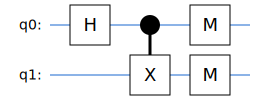

In [8]:
def circuitWithCNOT():

    #create a Quantum Circuit
    circuit = cirq.Circuit()

    # create two Named qubits
    # qubits are initialized as 0
    q0 = cirq.NamedQubit('q0')
    q1 = cirq.NamedQubit('q1')

#############  Write your Code here ########

def circuitWithCNOT():
    # create a Quantum Circuit
    circuit = cirq.Circuit()

    # create two Named qubits (initialized in |0⟩)
    q0 = cirq.NamedQubit('q0')
    q1 = cirq.NamedQubit('q1')

    ########### Write your Code here ###########


    # First putting control qubit q0 in superposition
    circuit.append(cirq.H(q0))
    # Next entangle using CNOT with q0 as control and ql as target
    circuit.append(cirq.CNOT(q0, q1))
    # Finally measuring q1 here
    circuit.append(cirq.measure(q1))

    # adding measurements of q0 and q1
    circuit.append(cirq.measure(q0))

    return circuit



#############  End of your Code here ########

    # add measurements of q0 and q1
    circuit.append(cirq.measure(q0))
    circuit.append(cirq.measure(q1))

    return circuit

circuit2 = circuitWithCNOT()

SVGCircuit(circuit2)

Now, let's perform measurements. Since we are exploring the entanglement, we need to measure the qubits in basis of |00>, |01>, |10>, and |11>.

In [9]:
simulator = cirq.Simulator()

# number of measurements
N = 1000

n00 = 0
n01 = 0
n10 = 0
n11 = 0

for i in tqdm(range(N)):
    result = simulator.run(circuit2)
    q0res = result.measurements['q0'][0][0]
    q1res = result.measurements['q1'][0][0]
    if (q0res,q1res) == (0,0):
        n00 += 1
    elif (q0res,q1res) == (0,1):
        n01 += 1
    elif (q0res,q1res) == (1,0):
        n10 += 1
    elif (q0res,q1res) == (1,1):
        n11 += 1
    else:
        print("ERROR")


  0%|          | 0/1000 [00:00<?, ?it/s]

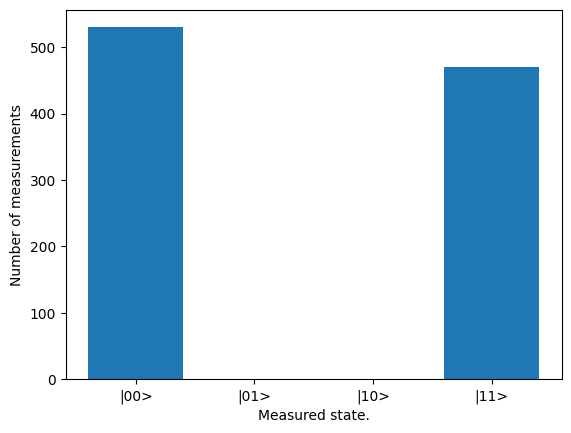

In [10]:
# plot the results

plt.bar(["|00>", "|01>", "|10>", "|11>"], height=[n00, n01, n10, n11])
plt.ylabel("Number of measurements");
plt.xlabel("Measured state.");

#### Problem 2.2 Are the outputs showing entangled quantum states?   If YES, show that it's an entangled state. If NO, revise your circuit in Problem 2.1 to create entangled states

The outputs do show an entangled state. With the circuit H on q0 followed by CNOT(q0 to q1), the state is ((|00>+|11>)/root2)

From the measurements we get to know that counts appear only in |00> and |11>. while |01> and |10> are ~0.

This distribution cannot come from a product state i.e if each qubit were independent with
P(0)=P(1)=0.5, we would see
P(00)=P(11)=0.25 and
P(01)=P(10)=0.25, instead we observe
P(00)~P(11)~0.5 and P(01)~P(10)~0.

Equivalently the state (|00>+|11>)/root2 cannot be written as (alpha|0> + beta|1> cross with (gamma|0> + delta|1>) because matching coeffcients would require alpha delta = 0 and beta gamma = 0 and alpha gamma is not equal to 0, beta delta is not equal to 0. Therefore the outputs are entangled.

## 4. Quantum algorithm

Now, let's implement the DJ algorithm.
Refer to the Lecture 7 notes and Chapter 8.1 of "Quantum Computing: An applied approach."

### Problem 3  Implement of Deutsch–Jozsa algorithm  (20 pts)
The Deutsch–Jozsa algorithm demonstrate the quantum advantage over the classical approach.

The $U_f(x)$ gate is generated and controlled by a random seed.
Same integer number of random parameter ``seed`` will always give the same $U_f(x)$

#### Problem 3.1 complete the code below to implement the DJ algorithm

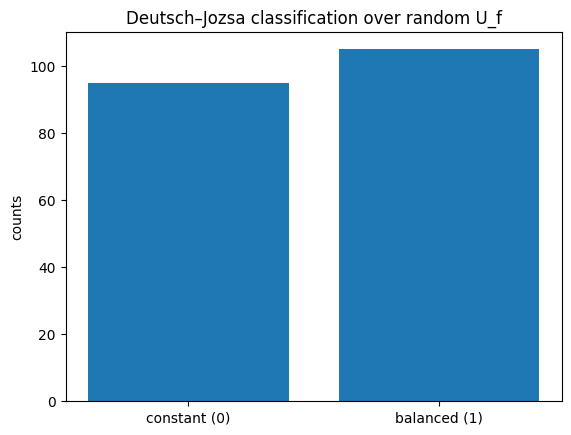

constant (0): 95, balanced (1): 105


In [11]:
import random
import numpy as np
import cirq
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

def circuitDJalgorithm(seed: int):
    # create a Quantum Circuit
    circuit = cirq.Circuit()

    # create two Named qubits (initialized in |0⟩)
    x = cirq.NamedQubit('x')
    u = cirq.NamedQubit('u')

    #############  Write your Code here ########
    # add your gates here before the U_f(x)



    # Prepare |+⟩ on x and |−⟩ on u
    circuit.append([cirq.X(u), cirq.H(x), cirq.H(u)])


   #############  End of your Code here ########

    # ----- Oracle U_f(x) -----
    # 0: f(x)=0 (constant)
    # 1: f(x)=1 (constant)
    # 2: f(x)=x (balanced)
    # 3: f(x)=¬x (balanced)
    oracles = {
        0: [],
        1: [cirq.X(u)],
        2: [cirq.CNOT(x, u)],
        3: [cirq.CNOT(x, u), cirq.X(u)]
    }
    random.seed(seed)
    uf = int(random.random() * 100) % 4
    if seed < 0:
        uf = (-seed) % 4
    circuit.append(oracles[uf])

#############  Write your Code here ########
# add your gates here after the U_f(x)



    circuit.append(cirq.H(x))

    # measure x (DJ decision bit): 0 → constant, 1 → balanced
    circuit.append(cirq.measure(x, key='x'))

    return circuit

# Preview a sample DJ circuit
SVGCircuit(circuitDJalgorithm(seed=7))

# Run many random oracles and plot results
simulator = cirq.Simulator()
N = 200  # number of random oracles to test
n_const, n_bal = 0, 0

for s in range(N):
    res = simulator.run(circuitDJalgorithm(seed=s), repetitions=1)
    bit = res.measurements['x'][0][0]
    if bit == 0:
        n_const += 1
    else:
        n_bal += 1

plt.bar(['constant (0)', 'balanced (1)'], [n_const, n_bal])
plt.ylabel('counts')
plt.title('Deutsch–Jozsa classification over random U_f')
plt.show()



   #############  End of your Code here ########

print(f"constant (0): {n_const}, balanced (1): {n_bal}")

Code below will run the DJ algorithm

In [12]:
#seed index that gives you an random U_f(x)
seedindex = -3
#you may change the number above to have different U_f(x)

simulator = cirq.Simulator()

circuit3 = circuitDJalgorithm(seedindex)

result = simulator.run(circuit3)
xout = result.measurements['x'][0][0]
ftype = "CONSTANT" if xout==0 else "BALANCED"

#print result.
print(f"Oracle {seedindex}, the measured x output: {xout}, which is {ftype}.")


Oracle -3, the measured x output: 1, which is BALANCED.


#### Problem 3.2 Please determine the type of $U_f(x)$ for the following ``seed``

You shall print a list of string of CONSTANT|BALANCED corresponding to each ``seed`` in the ``seedindexlist`` below.

Notw: we know that the U_f(x) is BALANCED with seedindex -3 and -2, and CONSTANT with seedindex -1 and 0.
i.e. your output list should start with ``['BALANCED', 'BALANCED', 'CONSTANT', 'CONSTANT']``

In [13]:
seedindexlist = [-3, -2, -1, 0, 3, 10, 12, 50, 89, 34]

#list to store the result
res = []


simulator = cirq.Simulator()

for seed in seedindexlist:
    circuit3 = circuitDJalgorithm(seed)
    result = simulator.run(circuit3)
#############  Write your Code here ########


    # read the DJ decision bit and map to label
    xout = int(result.measurements['x'][0][0])   # 0 → CONSTANT, 1 → BALANCED
    res.append("CONSTANT" if xout == 0 else "BALANCED")


#############  End of your Code here ########

#print the results
print(res)

['BALANCED', 'BALANCED', 'CONSTANT', 'CONSTANT', 'BALANCED', 'CONSTANT', 'BALANCED', 'CONSTANT', 'CONSTANT', 'CONSTANT']


Make sure you have the output string aboved saved to your iPython notebook.

## 5. More Quantum Circuit Practice

### Problem 4, Generation of three qubits Greenberger–Horne–Zeilinger (GHZ) state. (20 pts)

The GHZ state is defined as $\left|000\right> + \left|111\right>$.


#### Problem 4.1 Please complete the code below for the GHZ generating circuit.

The three qubits q0, q1, and q2 are all initialized at $\left| 0\right>$.

**Only single-qubit and two-qubit gates are allowed.**


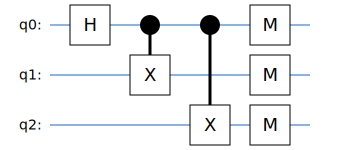

In [14]:
def circuitGHZ():

    circuit = cirq.Circuit()

    # create three Named qubits
    # qubits are initialized as 0
    q0 = cirq.NamedQubit('q0')
    q1 = cirq.NamedQubit('q1')
    q2 = cirq.NamedQubit('q2')

#############  Write your Code here ########


    # GHZ = (|000> + |111>)/√2
    circuit.append(cirq.H(q0))          # put q0 into superposition
    circuit.append(cirq.CNOT(q0, q1))   # entangle q1 with q0
    circuit.append(cirq.CNOT(q0, q2))   # entangle q2 with q0


#############  End of your Code here ########

    # add a measurement of all qubits
    circuit.append(cirq.Moment(cirq.measure(q0), cirq.measure(q1),cirq.measure(q2)))

    return circuit

#print out of circuit
SVGCircuit(circuitGHZ())


Now, let's check if you have generated the desired quantum state

In [15]:
simulator = cirq.Simulator()

circuit4 = circuitGHZ()

# number of measurements
N = 1000

nResult = [0]*8

for i in tqdm(range(N)):
    result = simulator.run(circuit4)
    q0res = result.measurements['q0'][0][0]
    q1res = result.measurements['q1'][0][0]
    q2res = result.measurements['q2'][0][0]
    state = q2res*4 + q1res*2 + q0res
    nResult[state] += 1


  0%|          | 0/1000 [00:00<?, ?it/s]

[495, 0, 0, 0, 0, 0, 0, 505]


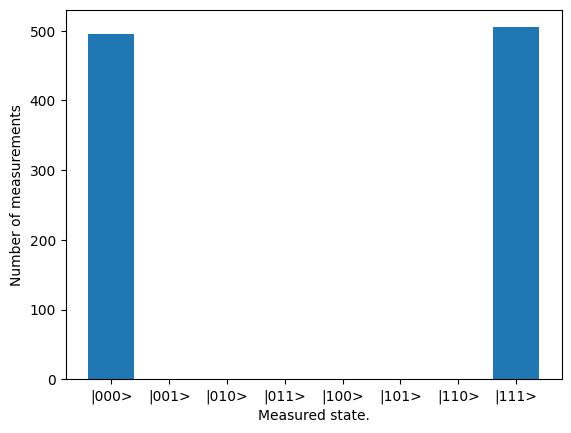

In [16]:
# print results
print(nResult)

#plot hist

plt.bar([f"|{i:03b}>" for i in range(8)], height=nResult)
plt.ylabel("Number of measurements");
plt.xlabel("Measured state.");

#### Problem 4.2 Analysis of the measurement.
Does the results of the measurement in consistant with the GHZ state?

#############  Write your Answer here ###########

Yes — the results match the GHZ state.

The GHZ state is
∣
GHZ
⟩
=
(
∣
000
⟩
+
∣
111
⟩
)
/
2
∣GHZ⟩=(∣000⟩+∣111⟩)/
2
	​

In the computational (Z) basis it should produce only two outcomes:
∣
000
⟩
∣000⟩ and
∣
111
⟩
∣111⟩, each with probability ~0.5, and zero counts for all other bitstrings.

My histogram shows exactly that: bars only at
∣
000
⟩
∣000⟩ and
∣
111
⟩
∣111⟩ (about 50/50) and ~0 elsewhere.

Each individual qubit looks random (0 or 1 with ~0.5), but the three are perfectly correlated: whenever one is 0, all are 0; whenever one is 1, all are 1.

Therefore, the measurement outcomes are consistent with generating the GHZ state.

#### (optional) Problem 4.3  ALL ON YOUR OWN -- Can you develop a quantum circuit with two qubits that generate the following distribution of measurement at output?   ---  BONUS 10 pts
![Figure for Problem 4.3](https://raw.githubusercontent.com/ZichenXi1217/Images-for-quantum-computing-lab/main/problem4_3_figA.png "Desired distribution of qubits at output")

Note: the numbers do not need to be exactly match.

**Please plot the histogram of the measured states of your circuit.**

ratios  [|00>, |01>, |10>, |11>]: [0.383 0.114 0.129 0.374]


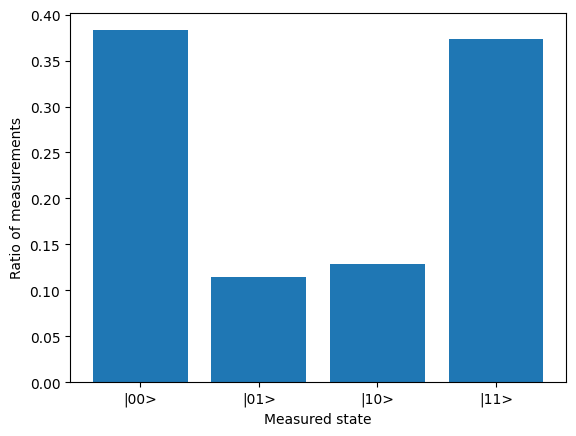

In [18]:
 #############  Write your Code here ########

# --- build a 2-qubit state with the desired measurement ratios ---
import numpy as np
import cirq
import matplotlib.pyplot as plt

circuit = cirq.Circuit()
q0 = cirq.NamedQubit('q0')
q1 = cirq.NamedQubit('q1')

# target probabilities from the figure
p00, p01, p10, p11 = 0.38, 0.12, 0.13, 0.37

# split by the first qubit: S0 = P(q0=0), S1 = P(q0=1)
S0 = p00 + p01
S1 = p10 + p11

# choose angles so that:
#   cos^2(θ0/2)=S0,  sin^2(β)=p01/S0,  sin^2(γ)=p11/S1
θ0 = 2*np.arccos(np.sqrt(S0))
β  = np.arcsin(np.sqrt(p01 / S0))
γ  = np.arcsin(np.sqrt(p11 / S1))

# prepare q0 with P(q0=0)=S0
circuit.append(cirq.ry(θ0)(q0))

# conditionally shape q1:
# when q0=0 → rotate by 2β ; when q0=1 → rotate by 2γ
circuit.append(cirq.ry(2*β)(q1).controlled_by(q0, control_values=[0]))
circuit.append(cirq.ry(2*γ)(q1).controlled_by(q0, control_values=[1]))

# measure
circuit.append([cirq.measure(q0, key='q0'), cirq.measure(q1, key='q1')])

# --- simulate and plot ratios ---
sim = cirq.Simulator()
shots = 10000
res = sim.run(circuit, repetitions=shots)

m0 = res.measurements['q0'].flatten()
m1 = res.measurements['q1'].flatten()
idx = m0*2 + m1                      # 00,01,10,11 -> 0..3
counts = np.bincount(idx, minlength=4)
ratios = counts / counts.sum()

print("ratios  [|00>, |01>, |10>, |11>]:", ratios.round(3))

plt.bar(['|00>', '|01>', '|10>', '|11>'], ratios)
plt.ylabel("Ratio of measurements")
plt.xlabel("Measured state")
plt.show()


#############  End of your Code here ########

### Problem 5 Measure the phase (30 pts)

Even with multiple quantum experiments, only the intensities of the output quantum state are measured, the phase information is being lost.
In the other words, the measurements on $ \left|+\right> = \frac{1}{\sqrt2} \left( \left|0\right>+\left|1\right> \right)$ and $ \left|-\right>=\frac{1}{\sqrt2} \left( \left|0\right>- \left|1\right> \right)$ will give you the same results.

#### Problem 5.1 Can you develop a quantum circuit to determine the phase $\phi$ of a superposition state $\left|\Psi\right>=\frac{1}{\sqrt2} \left( \left|0\right>+ e^{i\phi} \left|1\right> \right)$

You can assume you have as many as identical state $\left|\Psi\right>$ that you can perform measurements for many times.  

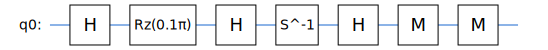

In [22]:
def circuitPhase(phi:float):

    circuit = cirq.Circuit()

    # create a Named qubit and prepare it in state with phase
    q0 = cirq.NamedQubit('q0')
    circuit.append(cirq.H(q0))
    circuit.append(cirq.rz(phi)(q0))

#############  Write your Code here ########
# add your gates here before the U_f(x)
# rotate X → Z, then the existing measure() reads X
    circuit.append(cirq.H(q0))
# rotate Y → Z: apply S† then H, then the existing measure() reads Y
    circuit.append(cirq.S(q0) ** -1)
    circuit.append(cirq.H(q0))
    circuit.append(cirq.Moment(cirq.measure(q0)))


#############  End of your Code here ########

    # add a measurement of x
    circuit.append(cirq.Moment(cirq.measure(q0) ))

    return circuit

#print out of circuit
SVGCircuit(circuitPhase(0.1*np.pi))

#### Problem 5.2 Can you explain how to get the phase $\phi$ based on the measured results. You may perform multiple experiments/measurements to get the statistics of the measurements.

To recover the phase
𝜙
ϕ of
∣
Ψ
⟩
=
1
2
(
∣
0
⟩
+
𝑒
𝑖
𝜙
∣
1
⟩
)
∣Ψ⟩=
2
	​

1
	​

(∣0⟩+e
iϕ
∣1⟩), rotate the qubit so you effectively measure in the X or Y basis:

For X basis: apply H then measure in Z. Over many shots, let
𝑝
1
(
𝑋
)
p
1
(X)
	​

 be the fraction of 1’s.

⟨
𝑋
⟩
=
1
−
2

𝑝
1
(
𝑋
)
≈
cos
⁡
𝜙
.
⟨X⟩=1−2p
1
(X)
	​

≈cosϕ.

For Y basis: apply S† then H then measure in Z. Let
𝑝
1
(
𝑌
)
p
1
(Y)
	​

 be the fraction of 1’s.

⟨
𝑌
⟩
=
1
−
2

𝑝
1
(
𝑌
)
≈
sin
⁡
𝜙
.
⟨Y⟩=1−2p
1
(Y)
	​

≈sinϕ.

Finally estimate the phase with

𝜙
^
=
atan2
⁡
(
⟨
𝑌
⟩
,
⟨
𝑋
⟩
)
.
ϕ
^
	​

=atan2(⟨Y⟩,⟨X⟩).

Using many repetitions (shots) reduces variance.



#### Problem 5.3 Can you plot your measured results versus different phase $\phi$?  

Similar to what we did in problem 1.1 with parameter $a$, but now the parameter is phase $\phi$

100%|██████████| 41/41 [00:00<00:00, 96.20it/s]


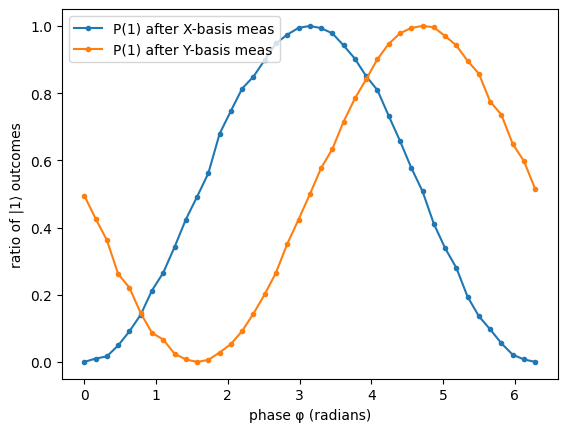

In [23]:
#############  Write your Code here ########
# be free to use more jupyter notebook sessions.

import numpy as np
import cirq
import matplotlib.pyplot as plt
from tqdm import tqdm

sim = cirq.Simulator()

# sweep phi from 0 to 2π
phi_list = np.linspace(0, 2*np.pi, 41)
shots = 2000

p1_X = []
p1_Y = []

for phi in tqdm(phi_list):
    # ----- X-basis measurement: H then measure -----
    q = cirq.NamedQubit('q')
    cX = cirq.Circuit(
        cirq.H(q),            # prepare |+>
        cirq.rz(phi)(q),      # add phase e^{i phi} on |1>
        cirq.H(q),            # rotate X -> Z
        cirq.measure(q, key='m')
    )
    rX = sim.run(cX, repetitions=shots)
    p1_X.append(np.mean(rX.measurements['m']))

    # ----- Y-basis measurement: S† then H then measure -----
    q = cirq.NamedQubit('q')
    cY = cirq.Circuit(
        cirq.H(q),
        cirq.rz(phi)(q),
        cirq.S(q) ** -1,      # rotate Y -> Z (S†)
        cirq.H(q),
        cirq.measure(q, key='m')
    )
    rY = sim.run(cY, repetitions=shots)
    p1_Y.append(np.mean(rY.measurements['m']))

# plot ratios of |1> vs phi
plt.plot(phi_list, p1_X, '.-', label='P(1) after X-basis meas')
plt.plot(phi_list, p1_Y, '.-', label='P(1) after Y-basis meas')
plt.xlabel('phase φ (radians)')
plt.ylabel('ratio of |1⟩ outcomes')
plt.legend()
plt.show()

# (optional) recover φ using expectation values
X_exp = 1 - 2*np.array(p1_X)   # ≈ cos φ
Y_exp = 1 - 2*np.array(p1_Y)   # ≈ sin φ
phi_hat = np.arctan2(Y_exp, X_exp)


#############  End of your Code here ########

### (Optional) Problem 6 Quantum Error Correction -- BONUS 50 pts

We are currently at the NISQ era, and the current quantum machines are suffering from noises. One approach to mitegate the noises is to encode one logical qubit on multiple physical qubits and perform **Quantum error correction**.


In this problem, we  will explore a basic quantum coding for error correction - **repetition code**.
As the name suggests, the repetition code repeats the logic qubit to physical qubits.

For example, for logic qubit $ \left| 0 \right>_L $, where the subscript $L$ indicates it is a logic qubit, we can use three physical qubits $ \left| 000 \right> $ to represent it. Similary $ \left| 1 \right>_L = \left| 111 \right>$.

In this case, we have the potential to *correct* one bit-flip error during our quantum computing.

For example, if one receives $ \left| 010 \right> $, we know it's $ \left| 0 \right>_L$ with a bit-flip error at the second physical qubit.



#### Problem 6.1 Repetition Encoding

First, we need to have a quantum circuit that "convert" logic qubit to phsyical qubits.

Can you show that the following quantum circuit can convert any logic qubit to physical qubits.

$$\alpha \left| 0 \right>_L + \beta \left| 1 \right>_L  \rightarrow  \alpha \left| 000 \right> + \beta \left| 111 \right> $$

![Figure for Problem 6.1](https://raw.githubusercontent.com/ZichenXi1217/Images-for-quantum-computing-lab/main/QEC_encode.png "encoding" )

Start with the logical qubit on
𝑞
0
q0 and two ancillas in
∣
0
⟩
∣0⟩:

(
𝛼
∣
0
⟩
+
𝛽
∣
1
⟩
)
⊗
∣
00
⟩
(α∣0⟩+β∣1⟩)⊗∣00⟩

Apply
C
N
O
T
(
𝑞
0
 ⁣
→
 ⁣
𝑞
1
)
CNOT(q0→q1):

𝛼
∣
000
⟩
+
𝛽
∣
110
⟩
α∣000⟩+β∣110⟩

Then apply
C
N
O
T
(
𝑞
0
 ⁣
→
 ⁣
𝑞
2
)
CNOT(q0→q2):

𝛼
∣
000
⟩
+
𝛽
∣
111
⟩
.
α∣000⟩+β∣111⟩.

So the circuit maps
𝛼
∣
0
⟩
𝐿
+
𝛽
∣
1
⟩
𝐿

→

𝛼
∣
000
⟩
+
𝛽
∣
111
⟩
α∣0⟩
L
	​

+β∣1⟩
L
	​

→α∣000⟩+β∣111⟩, which is exactly the 3-qubit repetition encoding.

#### Problem 6.2  Does the above quantum circit COPY the q0 to q1 and q2? If so, does it break the [no-cloning theorem]{https://en.wikipedia.org/wiki/No-cloning_theorem}. If not, please explain why it is not a cloning.  



It only copies classical basis states.

If the input is
∣
0
⟩
∣0⟩ or
∣
1
⟩
∣1⟩, the output is
∣
000
⟩
∣000⟩ or
∣
111
⟩
∣111⟩.

For a superposition
𝛼
∣
0
⟩
+
𝛽
∣
1
⟩
α∣0⟩+β∣1⟩, the output is the entangled state

𝛼
∣
000
⟩
+
𝛽
∣
111
⟩
α∣000⟩+β∣111⟩. Each single physical qubit is not in the original state
∣
𝜓
⟩
∣ψ⟩; its reduced state is mixed with probabilities
∣
𝛼
∣
2
,
∣
𝛽
∣
2
∣α∣
2
,∣β∣
2
 and has no off-diagonal coherence. Because the circuit does not produce independent copies of an arbitrary unknown state, it does not violate the no-cloning theorem.

#### Detecting Error Bit

Now we have encode one logic qubit on three physical qubits q0, q1, and q2.

On the receiving end, we need to detect errors.

We cannot directly measure the received qubit, as it will cause the collapes of the qubit, and thus cannot be used for further processing.

However, we need to use two additional qubits, ```qe0``` and ```qe1``` to detect the error.

A quantum error detection circuit is shown below:

![Figure for Problem 6.2](https://raw.githubusercontent.com/ZichenXi1217/Images-for-quantum-computing-lab/main/QEC_detect.png "detecting error" )

#### Problem 6.3 Can you show the measurements on ```qe0``` and ```qe1``` indicate bit-flip errors among ```q0```, ```q1```, ```q2```?

You may assume one bit flip of q0, q1 or q2, and explore the measured results of qe0 and qe1.

Syndrome idea: prepare ancillas qe0,qe1qe0,qe1qe0,qe1 in ∣0⟩|0\rangle∣0⟩.
Apply CNOTs q0→qe0q0\rightarrow qe0q0→qe0 and q1→qe0q1\rightarrow qe0q1→qe0 so that qe0=q0⊕q1qe0 = q0 \oplus q1qe0=q0⊕q1.
Apply CNOTs q1→qe1q1\rightarrow qe1q1→qe1 and q2→qe1q2\rightarrow qe1q2→qe1 so that qe1=q1⊕q2qe1 = q1 \oplus q2qe1=q1⊕q2.
Measuring qe0,qe1qe0,qe1qe0,qe1 gives parity checks that don’t reveal the logical bit, only where a flip happened.
Syndrome table (single bit-flip):


No error: (qe0,qe1)=(0,0)(qe0, qe1) = (0, 0)(qe0,qe1)=(0,0)


Flip on q0q0q0: (qe0,qe1)=(1,0)(qe0, qe1) = (1, 0)(qe0,qe1)=(1,0)


Flip on q1q1q1: (qe0,qe1)=(1,1)(qe0, qe1) = (1, 1)(qe0,qe1)=(1,1)


Flip on q2q2q2: (qe0,qe1)=(0,1)(qe0, qe1) = (0, 1)(qe0,qe1)=(0,1)


So the measurement outcomes of (qe0,qe1)(qe0,qe1)(qe0,qe1) pinpoint which of q0,q1,q2q0,q1,q2q0,q1,q2 flipped (or none), enabling single bit-flip error detection in the 3-qubit repetition code.

#### Problem 6.4 Can you design a quantum circuit to correct the errors based on the measured results of ```qe0``` and ```qe1```?

Note that you might need some gates are classically controlled by the measurements of qe0 and qe1.

Please refer to the document on [https://quantumai.google/cirq/build/classical_control](https://quantumai.google/cirq/build/classical_control) for building classically controlled gates

Measure the two ancillas as parities

𝑞
𝑒
0
=
𝑞
0
⊕
𝑞
1
qe0=q0⊕q1 and
𝑞
𝑒
1
=
𝑞
1
⊕
𝑞
2
qe1=q1⊕q2.
Use their outcomes
(
𝑠
0
,
𝑠
1
)
(s0,s1) to decide which physical qubit to flip:

(
0
,
0
)
(0,0) → no error (do nothing)

(
1
,
0
)
(1,0) → flip
𝑞
0
q0

(
1
,
1
)
(1,1) → flip
𝑞
1
q1

(
0
,
1
)
(0,1) → flip
𝑞
2
q2

Implement this by measuring the ancillas to classical bits and then applying classically-controlled
𝑋
X gates on
𝑞
0
,
𝑞
1
,
𝑞
2
q0,q1,q2 conditioned on
(
𝑠
0
,
𝑠
1
)
(s0,s1). This corrects any one bit-flip while keeping the logical information intact (we never directly measure
𝑞
0
,
𝑞
1
,
𝑞
2
q0,q1,q2).

#### Problem 6.5  Implement of Quantum Error Correction

Please complete code below to implement the quantum error correction.

We will use ```cirq.Moment``` to simulate the circuit step-by-step.

In [28]:
def circuitQEC(errorbit:int = 0):

    circuit = cirq.Circuit()

    # create three Named qubits
    # qubits are initialized as 0
    q0 = cirq.NamedQubit('q0')
    q1 = cirq.NamedQubit('q1')
    q2 = cirq.NamedQubit('q2')

    #following two qubits are used for error correction
    qe0 = cirq.NamedQubit('qe0')
    qe1 = cirq.NamedQubit('qe1')


    #encode part  -- problem  6.1
    circuit.append(cirq.Moment(cirq.CNOT(q0, q1)))
    circuit.append(cirq.Moment(cirq.CNOT(q0, q2)))
    # if you put gates in Moment, you will be able to see the result at that step.


    # the following line induce a bit-flip error at qubit #errorbit.
    if errorbit>=0:
        qerror = locals()[f"q{errorbit:1d}"]
        circuit.append(cirq.Moment(cirq.X(qerror)))


#############  Write your Code here ########
    #error detection part.  Problem 6.3

    # classically-controlled X corrections based on (s0, s1)
   k0 = cirq.KeyCondition(cirq.MeasurementKey('s0'))
   k1 = cirq.KeyCondition(cirq.MeasurementKey('s1'))

# (s0, s1) mapping: (1,0)->flip q0 ; (1,1)->flip q1 ; (0,1)->flip q2 ; (0,0)->do nothing
   circuit.append(cirq.Moment(cirq.X(q0).with_classical_controls(k0 & ~k1)))
   circuit.append(cirq.Moment(cirq.X(q1).with_classical_controls(k0 &  k1)))
   circuit.append(cirq.Moment(cirq.X(q2).with_classical_controls(~k0 & k1)))


#############  End of your Code here ########


#############  Write your Code here ########
    #error correction part  Problem 6.4

    # you may refer to document on https://quantumai.google/cirq/build/classical_control
    # for building classical controlled gates.
    # you may use following functions
    # sympy.symbols
    # sympy.Eq
    # cirq.X( q0 ).with_classical_controls( something )   this build an X gate on qubit q0, which controlled classically by something.

#############  End of your Code here ########


    return circuit

#print out of circuit
print(circuitQEC(1))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 32)

The code below will run the simulation of the quantum error correction.

Slightly from previous problems, we will have a **"GOD MODE"** in this simulation.

In this GOD MODE, we can set and read the superposition/coefficients of quantum states directly.  

You can check if your quantum error correction code works correctly.  

In [ ]:
simulator = cirq.Simulator()

#creat the circuit  You may change the errorbit parameter
# for errorbit = -1  no error
# for errorbit = 0, bit flip on q0
# for errorbit = 2, bit flip on q1
# for errorbit = 2, bit flip on q2
circuit6 = circuitQEC(errorbit=1)

#initial state, you may change it
alpha = np.sqrt(0.3)
beta = np.sqrt(0.7)
print(f"[info] initial input state = {alpha:.3} |0> + {beta:.3} |1>\n ")

# The code below generate the initial state for the simulator
init0 = np.zeros((2,2,2,2,2))
init0[0,0,0,0,0] = alpha
init0[1,0,0,0,0] = beta

#instead of run, we can use simulate_moment_steps to see results at each step
result = simulator.simulate_moment_steps(circuit6,
                                         initial_state=init0,
                                         qubit_order=[cirq.NamedQubit('q0'), cirq.NamedQubit('q1'), cirq.NamedQubit('q2'), cirq.NamedQubit('qe0'), cirq.NamedQubit('qe1'),])

#print out result at each step
print("The order of the qubits is  q0, q1, q2, qe0, qe1")
for i, step in enumerate(result):
    print(f"STEP: {i}")
    print(step.dirac_notation())


#get the final result
result = simulator.simulate(circuit6, initial_state=init0)

print("\n")
print(result)

Below code check the functions of your circuit, by inducing bit-flip errors on individual qubits.

In [ ]:
def outputhelper(state:np.ndarray):
    """
    helper function for output state in dirac notation.
    """
    first = True
    result = ""
    for i in [0,1]:
        for j in [0,1]:
            for k in [0,1]:
                if np.abs(state[i,j,k])>1e-6:
                    if first:
                        first = False
                    else:
                        result += "+"
                    result += f"{state[i,j,k]:.3}|{i}{j}{k}> "
    return result


simulator = cirq.Simulator()

for ebit in np.arange(-1,3,1):
    if ebit <0:
        print("Testing circuit with no error.")
    else:
        print(f"Testing circuit with bit flip error on q{ebit}")

    circuit6 = circuitQEC(errorbit=ebit)

    #initial state, you may change it
    alpha = np.sqrt(0.4)
    beta = np.sqrt(0.6)
    print(f"Initial input state = {alpha:.3} |0> + {beta:.3} |1> ")

    # The code below generate the initial state for the simulator
    init0 = np.zeros((2,2,2,2,2))
    init0[0,0,0,0,0] = alpha
    init0[1,0,0,0,0] = beta

    #get the final result
    result = simulator.simulate(circuit6, initial_state=init0)

    #check the output qubit.
    finalstate = result.final_state_vector
    finalstate = np.reshape(finalstate, (2,2,2,2,2))
    finalstate = np.sum(finalstate,(3,4))
    print(f"Final output state = {outputhelper(finalstate)}")
    print()


If the circuits and the codes are correct, you should get consistant input and output states.

The output state should be in form of $\alpha \left| 000 \right> + \beta \left| 111 \right>$, with $\alpha$ and $\beta$ same as input states.

## Congratulations!!!
### Now you learnt how to design and simulate quantum circuits.

## Below are for testing codes

-------------------------------------------------------------------------